# TRPL Analysis - Stack Comparison MAPI Aged

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

### File Lists

In [3]:
series = 'MAPI'
sample = ''
fluence = ''
date = ''
#Optional parameters to select different files

indecays = [file for file in os.listdir() if file.endswith('.py') and fluence in file and sample in file and date in file and series in file]
#Decays generated in iCCD dataprep

info = [file for file in os.listdir() if file.endswith('.csv')and date in file and series in file]
#Acquisiton information
print('\033[1mDecays\033[0m')
for i, d in enumerate(indecays):
    print(i, d,)
print('\033[1mInfo files\033[0m')
for i, inf in enumerate(info):
    print(i, inf)

Decays
0 iCCD_MAPI__150uW_C60_iCCD.py
1 iCCD_MAPI__150uW_FILM_iCCD.py
2 iCCD_MAPI__15uW_C60_iCCD.py
3 iCCD_MAPI__15uW_FILM_iCCD.py
4 iCCD_MAPI__1p5uW_C60_iCCD.py
5 iCCD_MAPI__1p5uW_FILM_iCCD.py
Info files
0 MAPI_2706_iCCD_info.csv


In [4]:
new_order = [5,3,1,4,2,0]
decays = [indecays[i] for i in new_order]
print('\033[1mDecays\033[0m')
for i, d in enumerate(decays):
    print(i, d,)
info = [info[0]]
print('\033[1mInfo files\033[0m')
for i, inf in enumerate(info):
    print(i, inf)

samples = ['FILM','C60']
sample_decays = [decays[:3],decays[3:6]]
print(sample_decays)
print(len(decays),len(samples))

Decays
0 iCCD_MAPI__1p5uW_FILM_iCCD.py
1 iCCD_MAPI__15uW_FILM_iCCD.py
2 iCCD_MAPI__150uW_FILM_iCCD.py
3 iCCD_MAPI__1p5uW_C60_iCCD.py
4 iCCD_MAPI__15uW_C60_iCCD.py
5 iCCD_MAPI__150uW_C60_iCCD.py
Info files
0 MAPI_2706_iCCD_info.csv
[['iCCD_MAPI__1p5uW_FILM_iCCD.py', 'iCCD_MAPI__15uW_FILM_iCCD.py', 'iCCD_MAPI__150uW_FILM_iCCD.py'], ['iCCD_MAPI__1p5uW_C60_iCCD.py', 'iCCD_MAPI__15uW_C60_iCCD.py', 'iCCD_MAPI__150uW_C60_iCCD.py']]
6 2


### Get Acquisition Parameters from info file

In [5]:
dfs = []
for i in info:
    load_df = pd.read_csv(i, delimiter=',', header=None)
    load_df.columns = load_df.iloc[0]  # Assign the first row as column names
    load_df = load_df[1:]  # Remove the first row from the DataFrame
    load_df.reset_index(drop=True, inplace=False)  # Reset the index
    dfs.append(load_df)
    print(load_df)


0              Parameters                                             Values
1          Measured Power                                     [1.5, 15, 150]
2              Absorption                                                0.9
3         Spot Area/ cm^2                                0.03192645105006955
4    Sample Thickness/ nm                                                160
5     Pump Wavelength/ nm                                                532
6  Carrier Density/ cm^-3  [7077692873350850.0, 7.07769287335085e+16, 7.0...
7   Power Fluence/ uJcm-2  [46.982985914957574, 469.8298591495757, 4698.2...
8  Energy Fluence/ nJcm-2  [46.982985914957574, 469.8298591495757, 4698.2...


In [6]:
carriers = []
for i, df in enumerate(dfs):
       
    #Get Carrier densities for labels
    carrier_densities =eval(df.iloc[5][1])
    carr_dens = []
    for num in carrier_densities:
        dens = f"{num:.1e}"
        carriers.append(dens)
carriers = carriers + carriers
print(carriers)

# average_carriers = []
# for i in range(3):
#     av_carr = np.mean([float(carriers[i]),float(carriers[i+3])])
#     average_carriers.append(f"{av_carr:.1e}")

# print(average_carriers)



['7.1e+15', '7.1e+16', '7.1e+17', '7.1e+15', '7.1e+16', '7.1e+17']


#### Plot fluences of each sample

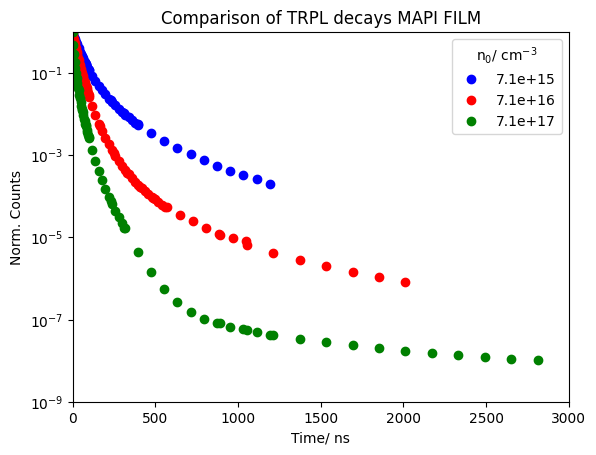

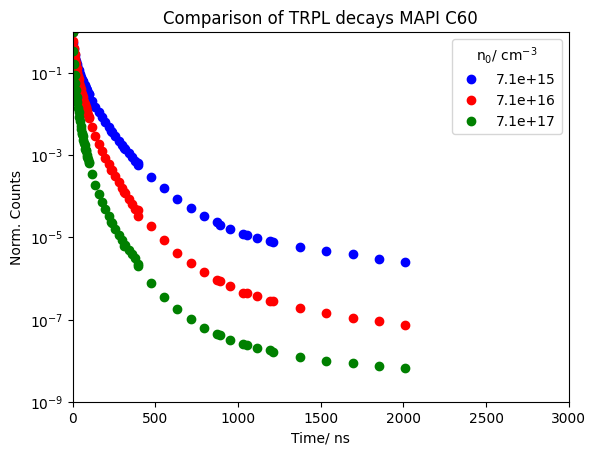

In [7]:
colors = ['blue','red','green','orange','purple','brown','pink','grey','olive','cyan','magenta','yellow']
endTime=3000
for sd,s in zip(sample_decays, samples):
    fig, ax = plt.subplots()
    for d,car,c in zip(sd,carriers,colors):
        
        with open(f'{d}', "rb") as file:
            data = pickle.load(file)
            time = data[0][:] - data[0][0]
            signal = data[1] / data[1][0]
            ax.plot(time, signal, 'o',color=c, label=car)

            ax.legend(title='n$_0$/ cm$^{-3}$')
            ax.set_yscale('log')
            ax.set_xlabel('Time/ ns')
            ax.set_ylabel('Norm. Counts')
            ax.set_xlim(0,endTime)
            
            ax.set_ylim(1e-9,1)
            ax.set_title(f'Comparison of TRPL decays MAPI {s}')
    plt.show()
if endTime == None:
    endTime = 'Full'
#fig.savefig(f'iCCD/StackComparison_TRPL_{date}_{series}_{fluence}_{endTime}ns.svg', dpi=300, bbox_inches='tight')

### Plot each fluence of each sample

In [8]:
def plot_trpl_decays(decays, full_carriers, select_fluences, samples=['FILM','2PACz','C60'], max_time=None, save=True):
    #print(decays, full_carriers, select_fluences, samples)
    sample_change = int(len(decays) / 2)
    print(sample_change)
    FILM = decays[:sample_change]
    
    C60 = decays[sample_change:]
    
    # Define colors for the plots
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']
    #colors = colors[:sample_change]

    
    # Iterate over selected fluences
    for f in select_fluences:
        times = []
        use_fluences = [f, sample_change + f]
        print(use_fluences)
        new_decays = [decays[i] for i in use_fluences]
        print(new_decays)
        # Reverse the order of decays
        #new_decays.reverse()
        
        use_carriers = [carriers[i] for i in use_fluences]

        # Create a new figure and axis for each set of decays
        fig, ax = plt.subplots()
        
        # Iterate over decays and carriers
        for i, (d, c) in enumerate(zip(new_decays, use_carriers)):
            # Load decay data from pickle file
            with open(f'{d}', "rb") as file:
                data = pickle.load(file)
                time = data[0][:] - data[0][0]
                signal = data[1] / data[1][0]
                
                # Trim the data based on the maximum time value
                if max_time is not None:
                    max_time_index = np.where(time == time[np.argmin(np.abs(np.array(time) - max_time))])[0]
                    time = time[:max_time_index[0]]
                    signal = signal[:max_time_index[0]]
                
                times.append(time.max())

                if i < sample_change:
                    # Use a color from the predefined list for the first set of decays
                    ax.plot(time, signal, 'o', label=samples[i], color=colors[i])
                elif i < sample_change_2 and i >= sample_change:
                    # Use a color from the predefined list for the second set of decays
                    ax.plot(time, signal, 's', label=samples[i], color=colors[i - sample_change])
                # else:
                #     # Use a color from the predefined list for the second set of decays
                #     ax.plot(time, signal, 'D', label=samples[i], fillstyle='none', color=colors[i - sample_change_2])

        # Add legend and axis labels
        ax.legend(title='Sample')
        ax.set_yscale('log')
        ax.set_xlabel('Time / ns')
        ax.set_ylabel('Norm. Counts')

        # Set the x-axis limits based on the maximum time value
        if max_time is None:
            ax.set_xlim(0, max(times))
        else:
            ax.set_xlim(0, max_time)

        # Calculate the mean of reduced carriers and add it to the title
        # reduced_carriers = list(map(float, reduced_carriers))
        # reduced_carriers_mean = f'{np.mean(reduced_carriers):.1e}'
        ax.set_title(f'Comparison MAPI stacks {sample} at ~{use_carriers[0]}')

        # if save:
        #     # Save the figure with a filename based on the parameters
        #     if max_time is None:
        #         fig.savefig(f'iCCD/TCMH_MAPI_{sample}_{reduced_carriers_mean}_Full.svg', dpi=300, bbox_inches='tight')
        #     else:
        #         fig.savefig(f'iCCD/TCMH_MAPI_{sample}_{reduced_carriers_mean}_{max_time}ns.svg', dpi=300, bbox_inches='tight')


3
[0, 3]
['iCCD_MAPI__1p5uW_FILM_iCCD.py', 'iCCD_MAPI__1p5uW_C60_iCCD.py']


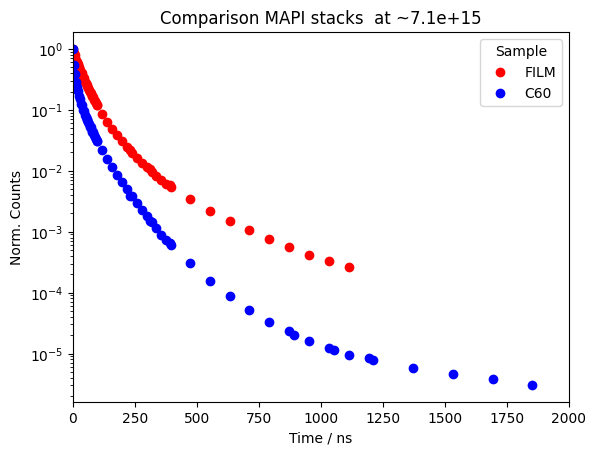

In [9]:
select = 0


plot_trpl_decays(decays, carriers, select_fluences = [select], max_time=2000, save=False,samples=['FILM','C60'])

iCCD_MAPI__1p5uW_FILM_iCCD.py


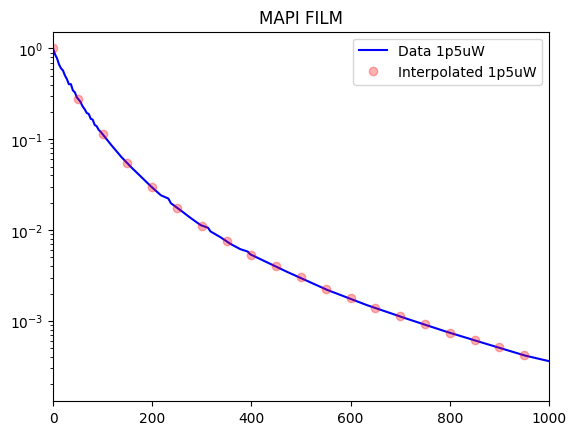

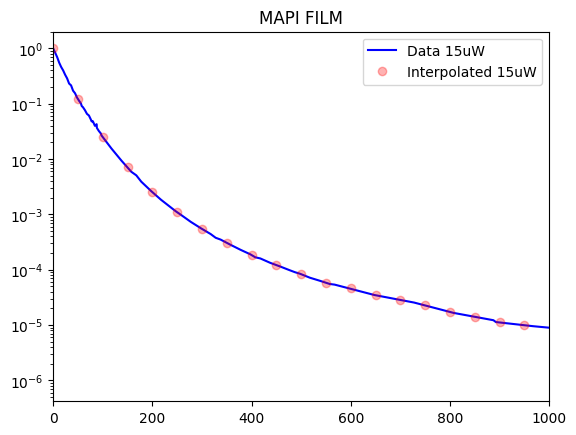

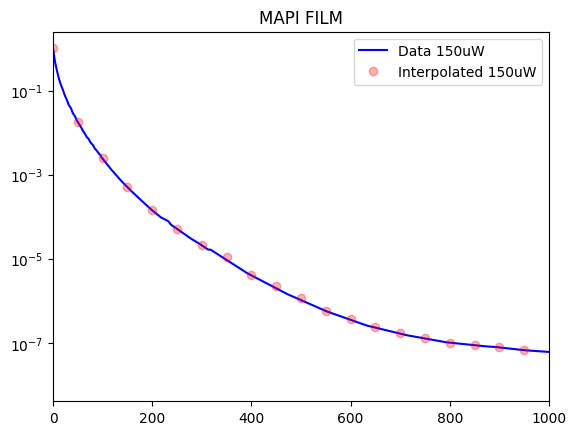

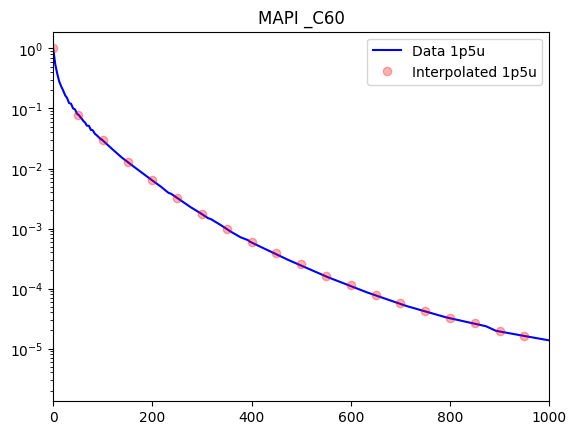

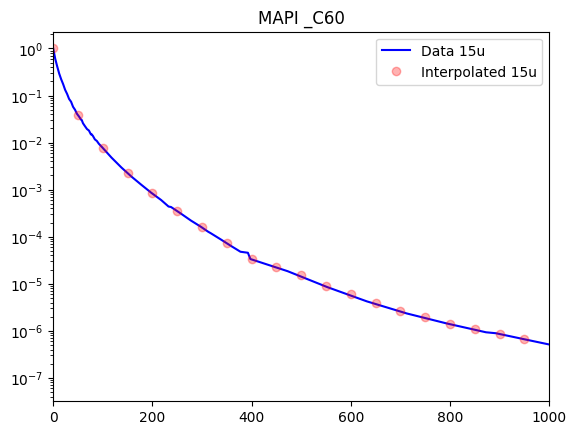

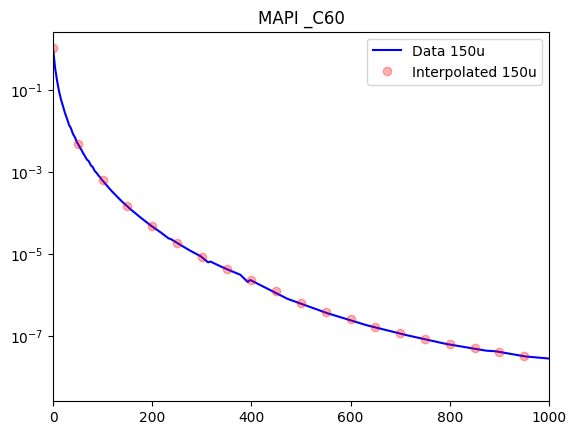

In [49]:
from scipy.interpolate import interp1d
print(decays[0])
decay_funcs = []
interpolated_decays = []

for dec in decays:
    with open(f'{dec}', "rb") as file:
                data = pickle.load(file)
                time = data[0][:] - data[0][0]
                
                signal = data[1] / data[1][0]
                
                decay_func = interp1d(time,signal)
                decay_funcs.append(decay_func)

                new_time = np.arange(0,1000,50)
                new_signal = decay_func(new_time)

                plt.plot(time,signal,'b',label = f'Data {dec[11:-13]}')
                plt.plot(new_time,new_signal,'ro',alpha=0.3,label=f'Interpolated {dec[11:-13]}')
                plt.yscale('log')
                plt.title(f'MAPI {dec[-12:-8]}')
                plt.legend()
                plt.xlim(0,1000)
                plt.show()

                interpolated_decays.append(np.column_stack((new_time,new_signal)))

